In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('jamesbond.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
Film                 26 non-null object
Year                 26 non-null int64
Actor                26 non-null object
Director             26 non-null object
Box Office           26 non-null float64
Budget               26 non-null float64
Bond Actor Salary    18 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


In [5]:
# Treatment of Null Values

In [8]:
df['Bond Actor Salary'] = df['Bond Actor Salary'].replace(np.NaN, df['Bond Actor Salary'].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
Film                 26 non-null object
Year                 26 non-null int64
Actor                26 non-null object
Director             26 non-null object
Box Office           26 non-null float64
Budget               26 non-null float64
Bond Actor Salary    26 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


In [10]:
df.head(2)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6


# Actor with Maximum number of James Bond Movies

In [19]:
df['Actor'].value_counts()

Sean Connery      7
Roger Moore       7
Pierce Brosnan    4
Daniel Craig      4
Timothy Dalton    2
David Niven       1
George Lazenby    1
Name: Actor, dtype: int64

Text(0, 0.5, 'Actors')

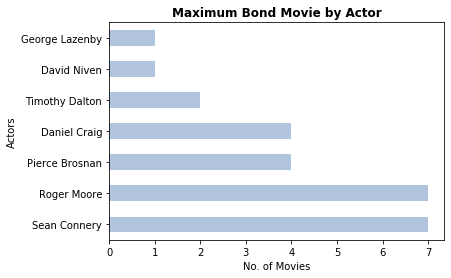

In [18]:
df['Actor'].value_counts().plot(kind = 'barh', color = 'lightsteelblue')
plt.title('Maximum Bond Movie by Actor', fontdict = {'fontweight': 'bold'})
plt.xlabel('No. of Movies')
plt.ylabel('Actors')

# Directors with Maximum number of James Bond Movies directed

Text(0, 0.5, 'Movies Directed')

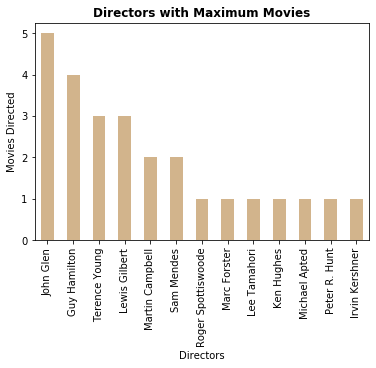

In [27]:
df['Director'].value_counts().plot(kind = 'bar', color = 'tan')
plt.title('Directors with Maximum Movies', fontdict = {'fontweight': 'bold'})
plt.xlabel('Directors')
plt.ylabel('Movies Directed')

# Highest Grossing Movie - Top 10

In [32]:
highest = df.sort_values('Box Office', ascending = False).head(10)

In [34]:
film = highest['Film']
bo = highest['Box Office']

Text(0, 0.5, 'Moview Name')

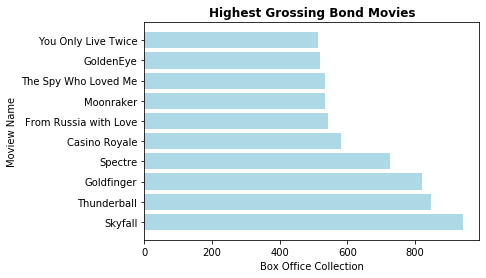

In [38]:
plt.barh(film,bo, color =  'lightblue')
plt.xlabel('Box Office Collection')
plt.title('Highest Grossing Bond Movies', fontdict = {'fontweight' : 'bold'})
plt.ylabel('Moview Name')

# Moview With Maximum Budget

In [43]:
budget = df.sort_values('Budget', ascending = False).head(10)

In [45]:
film = budget['Film']
budget = budget['Budget']

Text(0.5, 0, 'Budget')

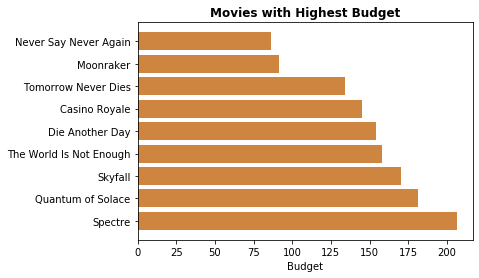

In [61]:
plt.barh(film,budget, color = 'peru')
plt.title('Movies with Highest Budget', fontdict = {'fontweight': 'bold'})
plt.xlabel('Budget')

# Avg Bond Actor Salary

In [66]:
df['Bond Actor Salary'].mean()

6.85

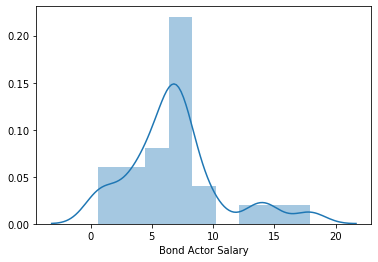

In [64]:
sns.distplot(df['Bond Actor Salary'])

# Actors with Highest Box Office Collection

In [79]:
actor = df.groupby('Actor')

In [75]:
actor.first()

,Film,Year,Director,Box Office,Budget,Bond Actor Salary
Actor,,,,,,
Daniel Craig,Casino Royale,2006,Martin Campbell,581.5,145.3,3.30
David Niven,Casino Royale,1967,Ken Hughes,315.0,85.0,6.85
George Lazenby,On Her Majesty's Secret Service,1969,Peter R. Hunt,291.5,37.3,0.60
Pierce Brosnan,GoldenEye,1995,Martin Campbell,518.5,76.9,5.10
Roger Moore,Live and Let Die,1973,Guy Hamilton,460.3,30.8,6.85
Sean Connery,Dr. No,1962,Terence Young,448.8,7.0,0.60
Timothy Dalton,The Living Daylights,1987,John Glen,313.5,68.8,5.20


Text(0.5, 1.0, 'Actors by Total box office Collection')

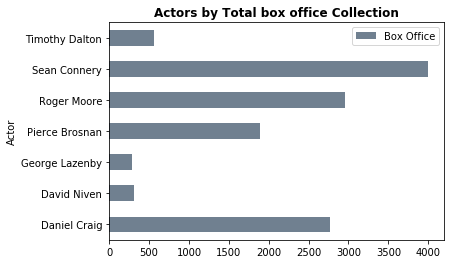

In [81]:
actor.agg({'Box Office' : 'sum'}).plot(kind = 'barh', color = 'slategray')
plt.title('Actors by Total box office Collection', fontdict = {'fontweight':'bold'})

# Highest Actor Salary

In [86]:
high = df.sort_values('Bond Actor Salary', ascending = False).head(5)

In [87]:
high

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
21,Die Another Day,2002,Pierce Brosnan,Lee Tamahori,465.4,154.2,17.9
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
20,The World Is Not Enough,1999,Pierce Brosnan,Michael Apted,439.5,158.3,13.5
19,Tomorrow Never Dies,1997,Pierce Brosnan,Roger Spottiswoode,463.2,133.9,10.0
15,A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1


In [90]:
actor = high['Actor']
film = high['Film']
salary = high['Bond Actor Salary']

Text(0, 0.5, 'Salary Paid')

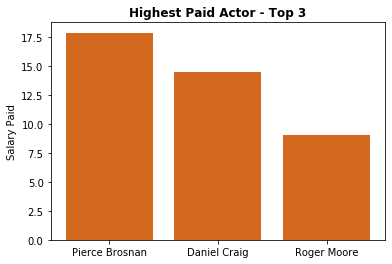

In [95]:
plt.bar(actor, salary, color = 'chocolate')
plt.title('Highest Paid Actor - Top 3', fontdict = {'fontweight':'bold'})
plt.ylabel('Salary Paid')

# Profits by each movie

In [99]:
df['Profit'] = df['Box Office'] - df['Budget']

In [100]:
df.head()

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,Profit
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.60,441.8
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.60,531.2
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.20,801.8
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.70,806.2
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,6.85,230.0


In [110]:
profit = df.sort_values('Profit', ascending = False).head(10)

In [111]:
film = profit['Film']
p = profit['Profit']

Text(0.5, 1.0, 'Movies by Profit Generated - Top 10 ')

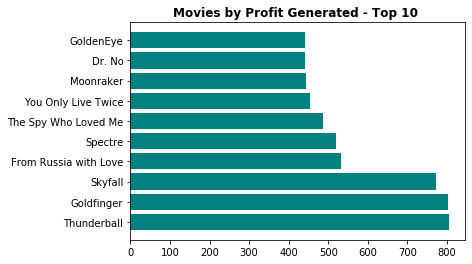

In [113]:
plt.barh(film,p, color = 'teal')
plt.title('Movies by Profit Generated - Top 10 ', fontdict = {'fontweight' : 'bold'})